#Data Science Lifecycle

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
#Maya Ali 202206400
#Toufic Al Mabsout 202204631

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

combined_df = pd.concat([test_df, train_df], ignore_index=True)
combined_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666.0,311.0,360.0,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428.0,150.0,360.0,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [ ]:
combined_df.shape
print("The row size: "+  str(combined_df.shape[0]))
print("The column size: "+  str(combined_df.shape[1]))

The row size: 614
The column size: 13


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Where did you find some missing values?     

**Missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History [We see that because of the non_null count column < 614]**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
combined_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [ ]:
credit_df = combined_df['Credit_History']
unique_values = credit_df.unique()

print("Unique values in 'Credit_History':")
for value in unique_values:
  print(value)

Unique values in 'Credit_History':
1.0
0.0
nan


Do the same with the variable Loan_Amount_Term

In [ ]:
loan_df = combined_df['Loan_Amount_Term']
unique_values = loan_df.unique()

print("Unique values in 'Loan_Amount_Term':")
for value in unique_values:
  print(value)

Unique values in 'Loan_Amount_Term':
180.0
360.0
480.0
36.0
84.0
240.0
120.0
nan
60.0
300.0
12.0


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
combined_df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002648,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Interpret the results you obtained for the variable Gender

**Most of the applicants in the dataset are male (489 entries), while a smaller portion are either female or have missing gender information (112 entries including females and missing values).**

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:
property_area_df = combined_df['Property_Area']
property_area_counts = property_area_df.value_counts()
print(property_area_counts)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [ ]:
dependents_df = combined_df['Dependents']
dependents_counts = dependents_df.value_counts()
print(dependents_counts)

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:
removeNA_df = combined_df.dropna()

Plot the distribution and the boxplot for the variable 'LoanAmount'

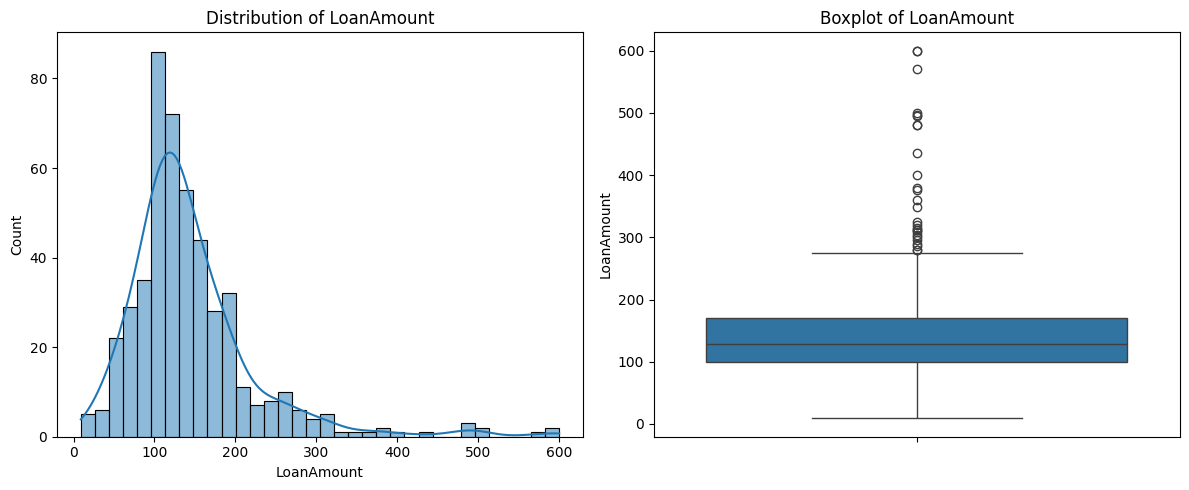

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(removeNA_df['LoanAmount'], kde=True)
plt.title('Distribution of LoanAmount')

plt.subplot(1, 2, 2)
sns.boxplot(y=removeNA_df['LoanAmount'])
plt.title('Boxplot of LoanAmount')

plt.tight_layout()
plt.show()

* Is there any outlier?
* Is the data skewed?

**There is visible outliers > 300.  
  The data is positively(right) skewed.**

Do the same for the variable 'ApplicantIncome'

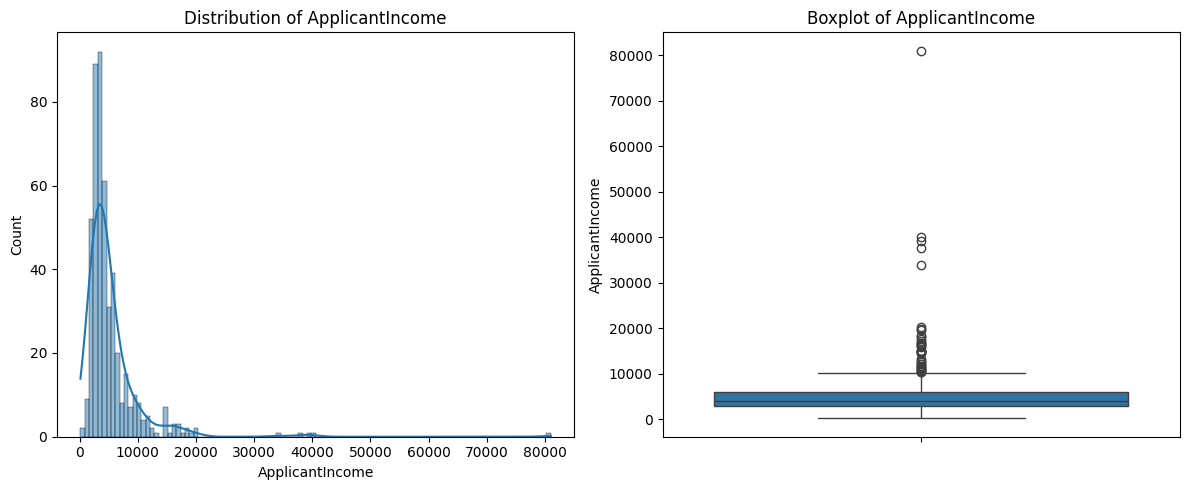

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(removeNA_df['ApplicantIncome'], kde=True)
plt.title('Distribution of ApplicantIncome')

plt.subplot(1, 2, 2)
sns.boxplot(y=removeNA_df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')

plt.tight_layout()
plt.show()

* Is there any outlier?
* Is the data skewed?

**There is visible outliers > 10000.  
  The data is positively(right) skewed.**

Do the same for 'CoapplicantIncome'

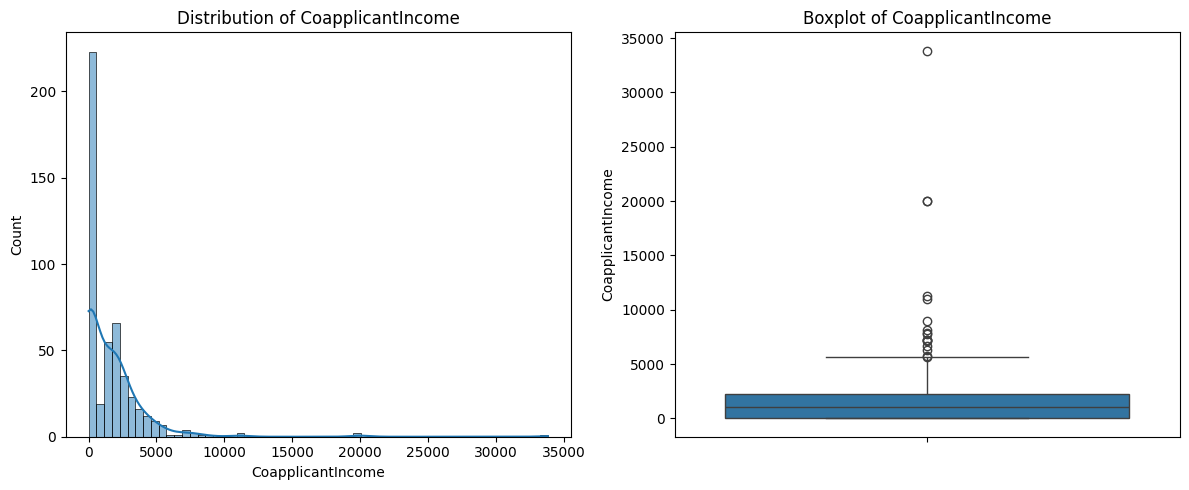

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(removeNA_df['CoapplicantIncome'], kde=True)
plt.title('Distribution of CoapplicantIncome')

plt.subplot(1, 2, 2)
sns.boxplot(y=removeNA_df['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantIncome')

plt.tight_layout()
plt.show()

**There is visible outliers > 7500.  
  The data is positively(right) skewed.**

Do the same for 'Loan_Amount_Term'

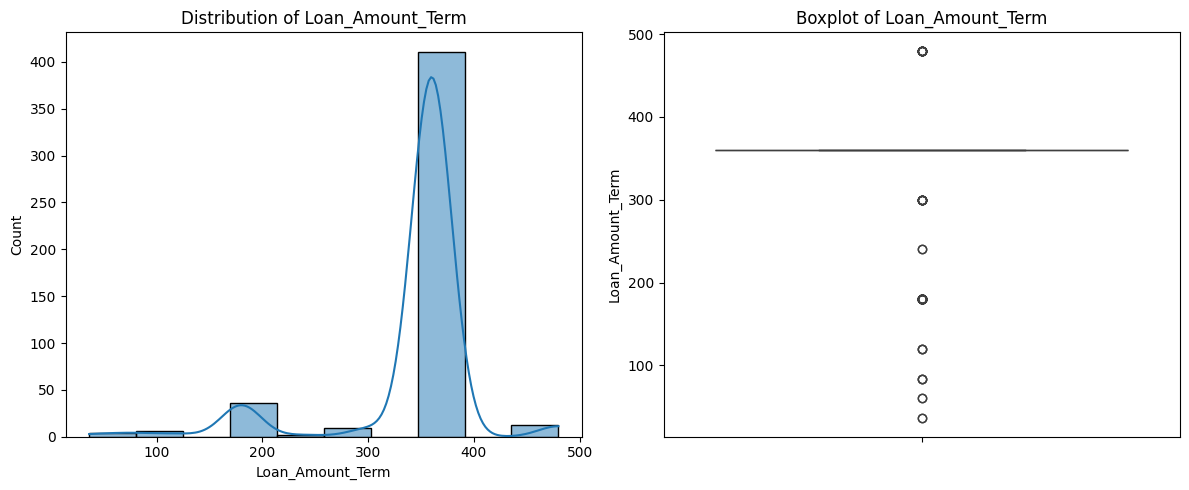

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(removeNA_df['Loan_Amount_Term'], kde=True)
plt.title('Distribution of Loan_Amount_Term')

plt.subplot(1, 2, 2)
sns.boxplot(y=removeNA_df['Loan_Amount_Term'])
plt.title('Boxplot of Loan_Amount_Term')

plt.tight_layout()
plt.show()

What do you think about outliers in this case?

**The outliers in this dataset are severe in terms of their distance from the main cluster of data and their potential impact on statistical analysis.

The specific context of the loans in the dataset —such as the type of loans and the time period—explains why these outliers exist. **

Plot the value_counts for 'Loan_Amount_term'

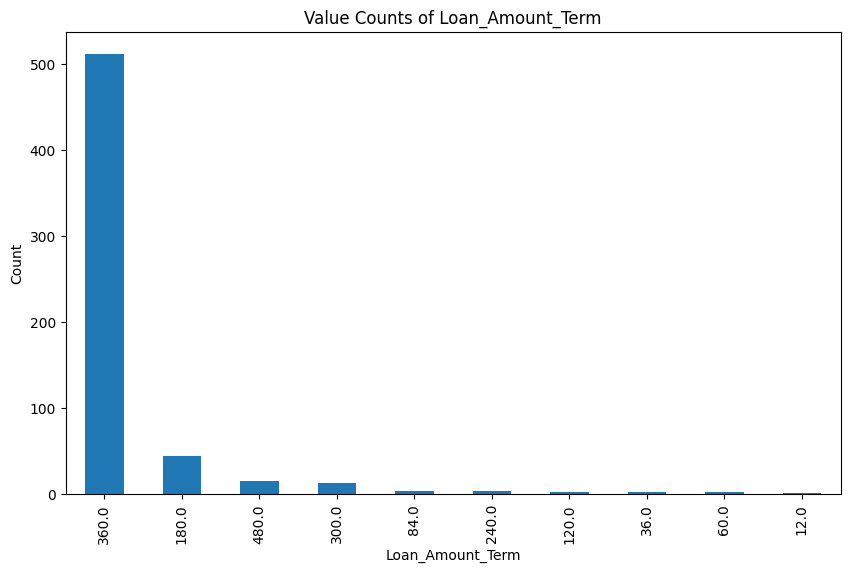

In [ ]:
plt.figure(figsize=(10, 6))
combined_df['Loan_Amount_Term'].value_counts().plot(kind='bar')
plt.title('Value Counts of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.show()

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

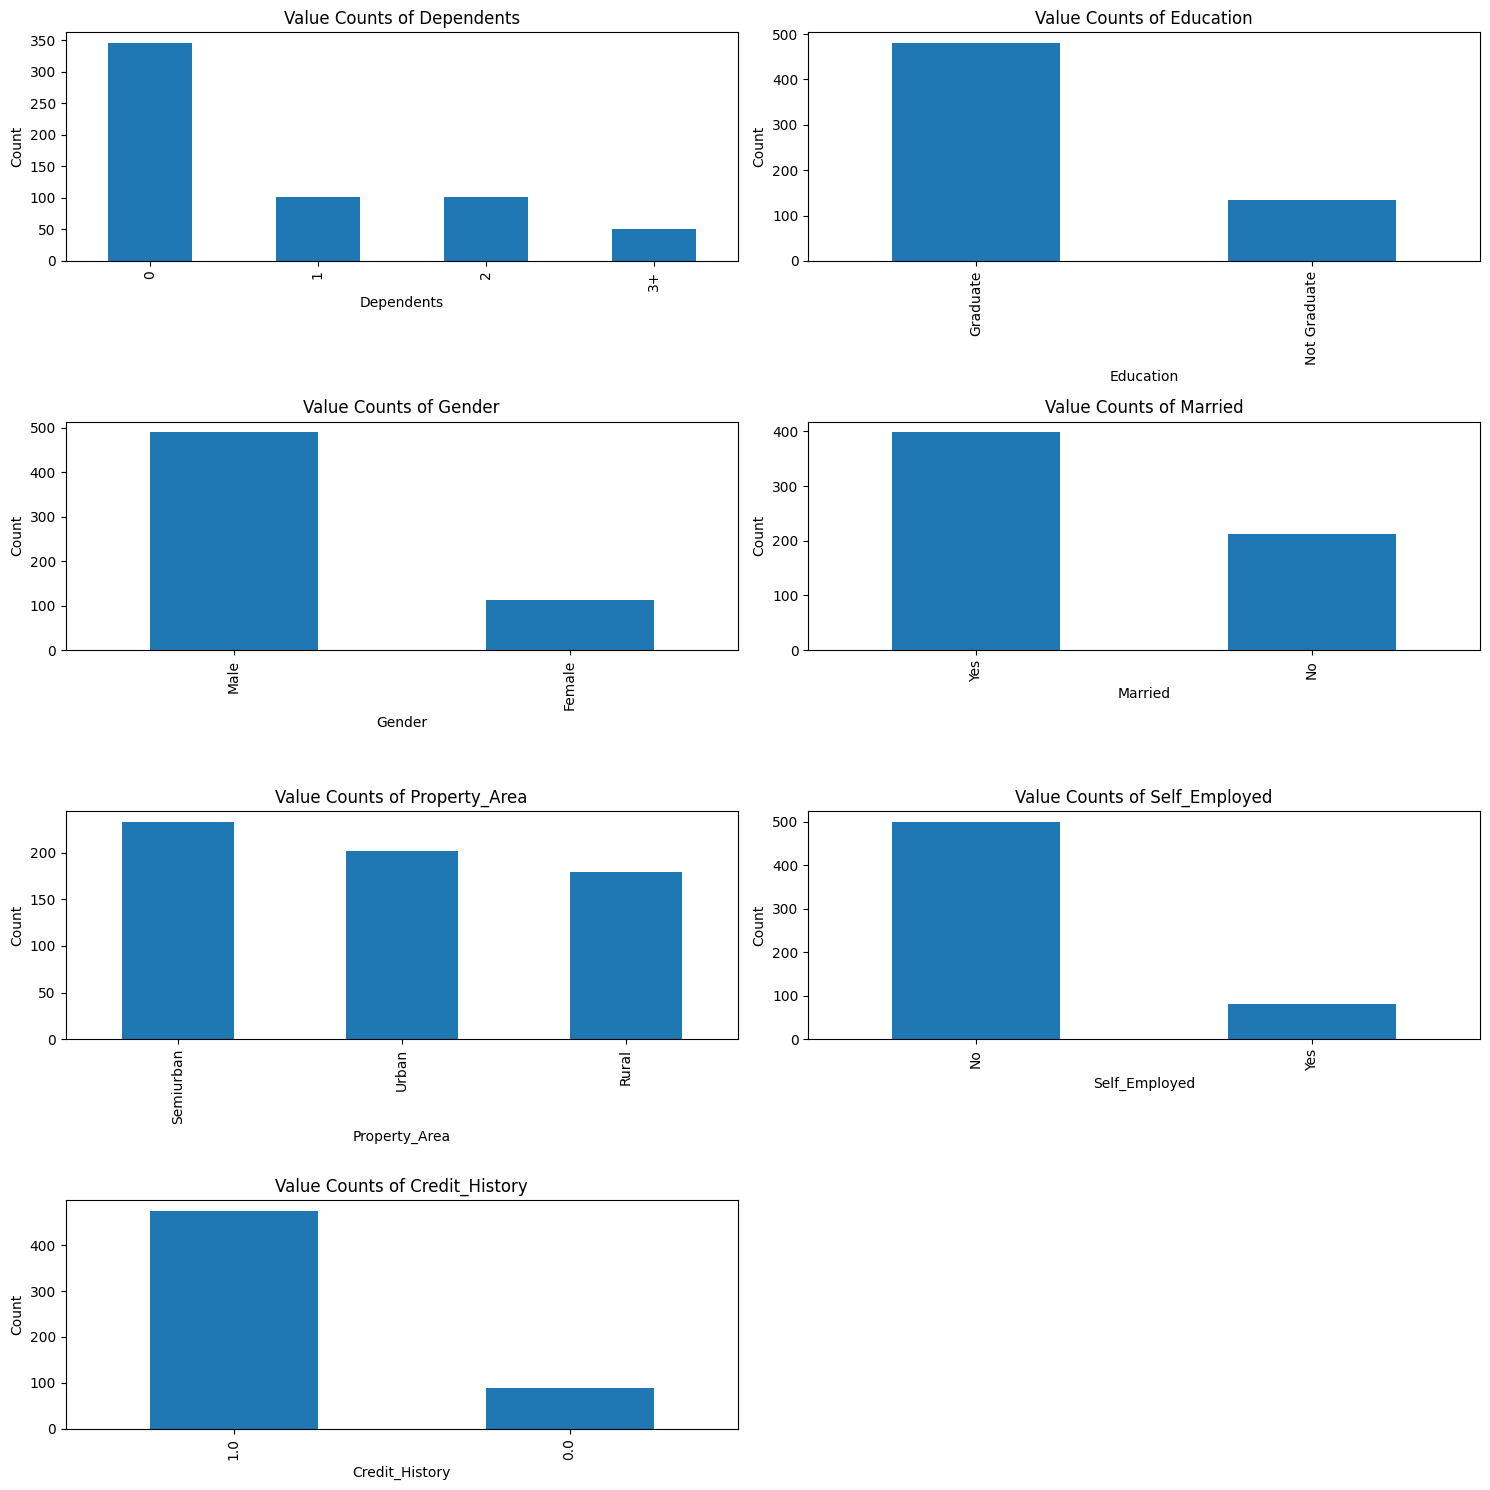

In [ ]:
categorical_vars = ['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed', 'Credit_History']

plt.figure(figsize=(15, 15))
for i, var in enumerate(categorical_vars):
  plt.subplot(4, 2, i+1)
  combined_df[var].value_counts().plot(kind='bar')
  plt.title(f'Value Counts of {var}')
  plt.xlabel(var)
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

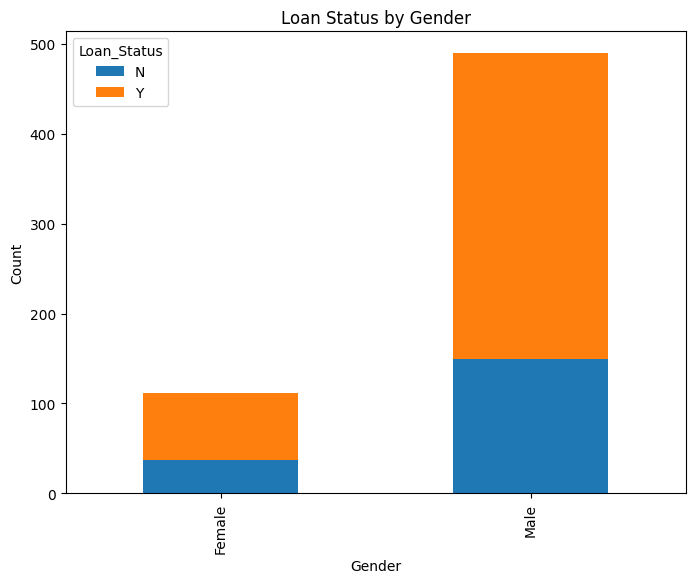

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Gender'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Does the Gender affect the acceptance of the Loan?

**No, gender doesnt affect the acceptance of the loan as we can see in the crosstab plot where almost same percentages of male and female gets their loans accepted.**

Do the same with Credit_history and Loan_Status

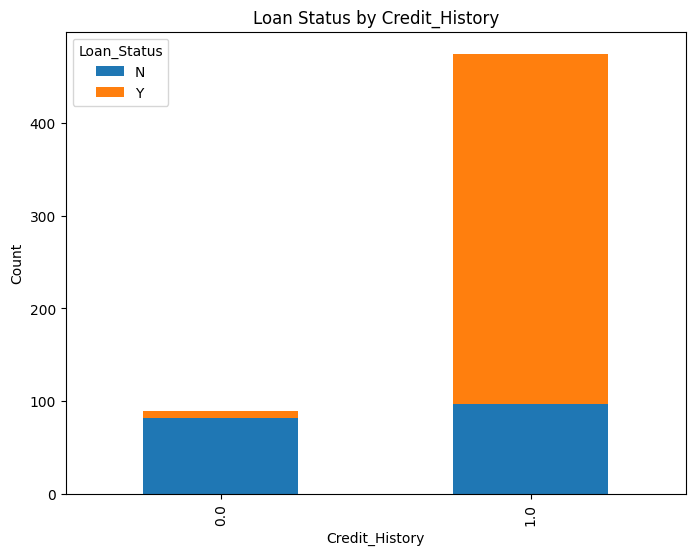

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Credit_History'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.show()

Does the Credit History affect the acceptance of the Loan?

**Yes, it affects, if you have credit history, more loan is accepted.**

Do the same with Dependents and Loan_Status

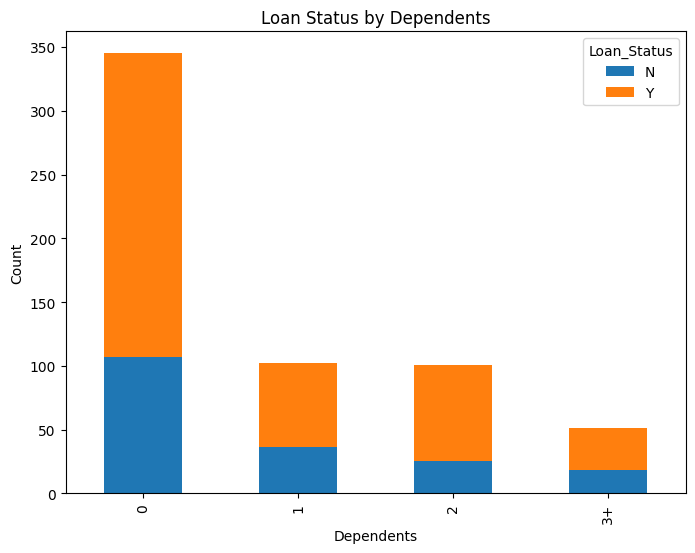

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Dependents'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Does the number of dependents affect the acceptance of the Loan?

**No It doesnt affect significantly.**

Do the same between Education and Loan_Status

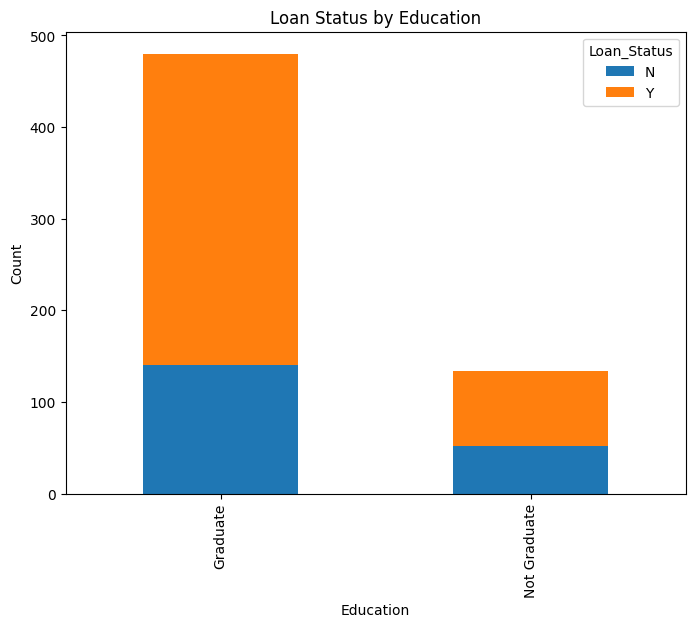

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Education'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Does the level of education affect the acceptance of the Loan?

**No, it doesnt affect. Same percentages of loans get accepted for both gradutates and not graduates.**

Do the same between Married and Loan_Status

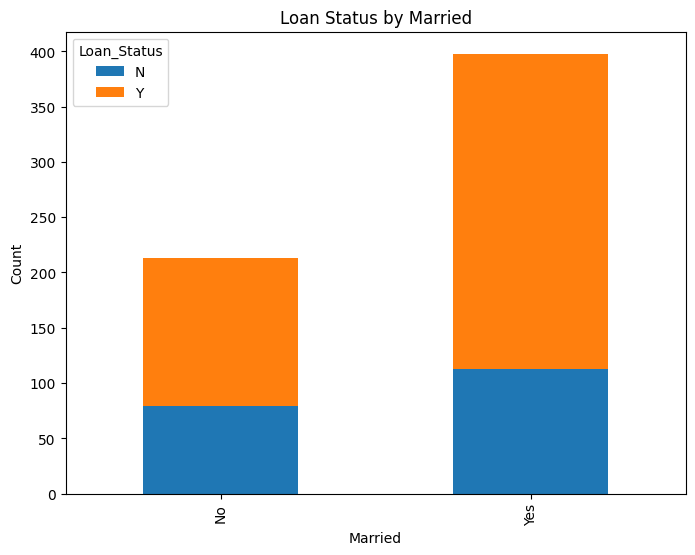

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Married'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

Does the marriage affect the acceptance of the Loan?

**No, it doesnt affect.**

Do the same between Property_Area and Loan_Status

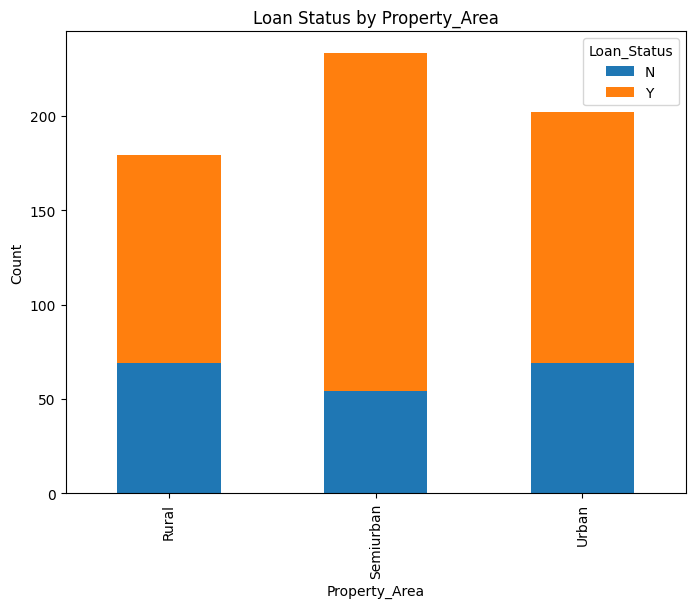

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Property_Area'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.show()

Does the Property Area affect the acceptance of the Loan?

**No, property Area doesnt affect the acceptance of the loan.**

Do the same between Self_Employed and Loan_Status

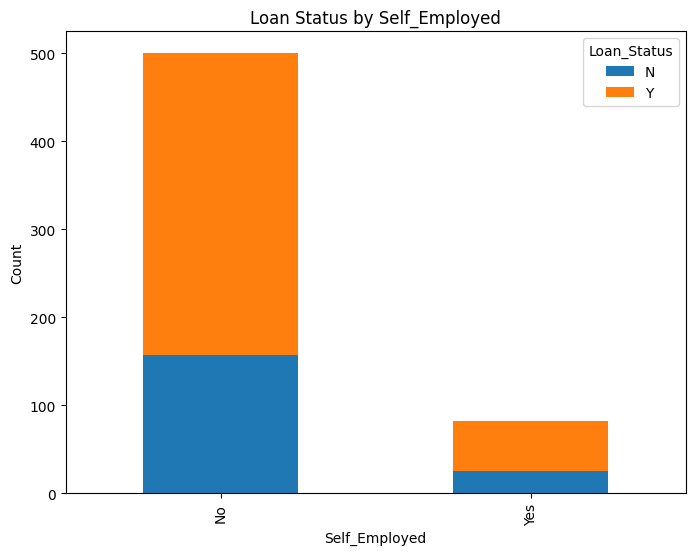

In [ ]:
gender_loan_crosstab = pd.crosstab(combined_df['Self_Employed'], combined_df['Loan_Status'])
gender_loan_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()

Does the Self Employed Property affect the acceptance of the Loan?

**No, it doesnt affect. Same % of yes for self employed and not self employed.**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

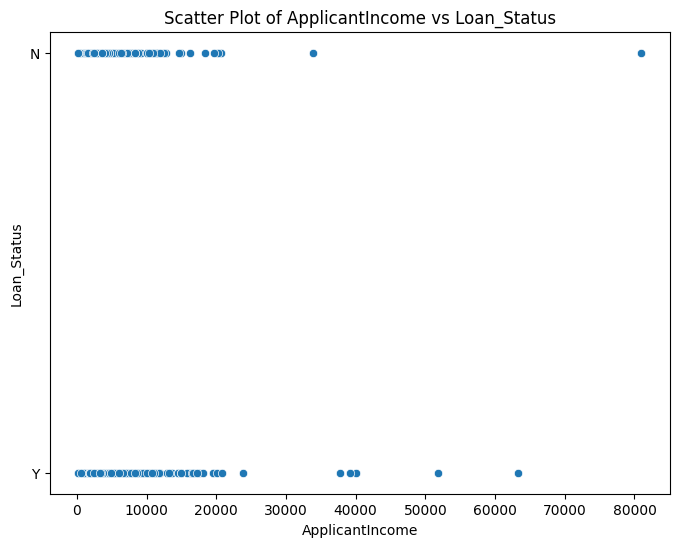

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='Loan_Status', data=combined_df)
plt.title('Scatter Plot of ApplicantIncome vs Loan_Status')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

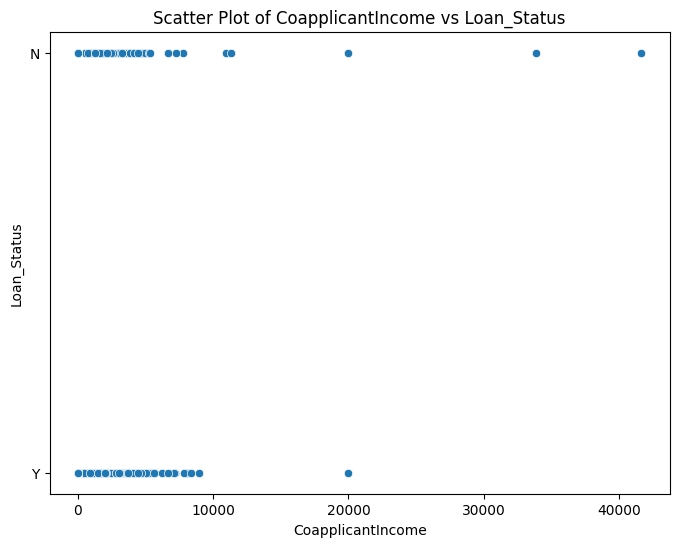

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CoapplicantIncome', y='Loan_Status', data=combined_df)
plt.title('Scatter Plot of CoapplicantIncome vs Loan_Status')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

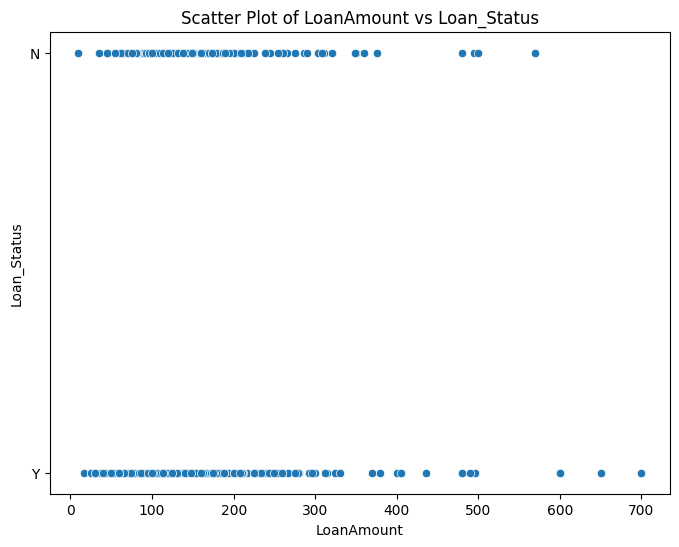

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='Loan_Status', data=combined_df)
plt.title('Scatter Plot of LoanAmount vs Loan_Status')
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Status')
plt.show()

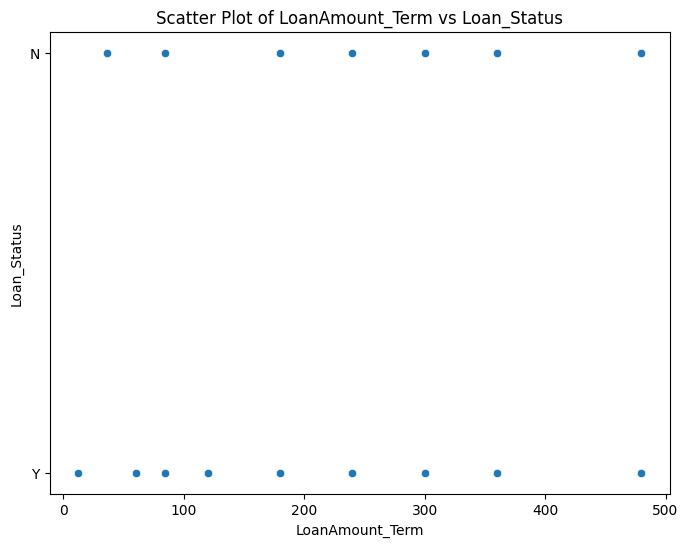

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Loan_Amount_Term', y='Loan_Status', data=combined_df)
plt.title('Scatter Plot of LoanAmount_Term vs Loan_Status')
plt.xlabel('LoanAmount_Term')
plt.ylabel('Loan_Status')
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

**No**

Group your dataframe by Loan_Status on the median Value

In [ ]:
numerical_columns = combined_df.select_dtypes(include=['number'])
categorical_columns = combined_df.select_dtypes(exclude=['number'])

numerical_median = combined_df.groupby('Loan_Status')[numerical_columns.columns].median()

categorical_mode = combined_df.groupby('Loan_Status')[categorical_columns.columns].agg(lambda x: x.mode()[0])

grouped_combined = pd.concat([numerical_median, categorical_mode], axis=1)
grouped_combined


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_Status,,,,,,,,,,,,,
N,3833.5,268.0,129.0,360.0,1.0,LP001003,Male,Yes,0,Graduate,No,Rural,N
Y,3812.5,1239.5,126.0,360.0,1.0,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y


What did you deduce?

**The key differentiator for loan approval seems to be the CoapplicantIncome. Applicants with higher combined household income (including coapplicant income) have a better chance of loan approval. Additionally, the Property Area may also play a role, with loans for properties in semiurban areas being more likely to be approved compared to rural areas.**

**Additionally, from previous conclusions, credit history influence the likelihood of loan acceptance.**

**The other factors, such as the loan amount, loan term, and applicant income, appear to be less influential in determining loan approval based on these median values.**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:
combined_df = combined_df.drop('Gender', axis=1)
combined_df = combined_df.drop('ApplicantIncome', axis=1)
combined_df = combined_df.drop('LoanAmount', axis=1)
combined_df = combined_df.drop('Loan_Amount_Term', axis=1)
combined_df = combined_df.drop('Married', axis=1)
combined_df = combined_df.drop('Education', axis=1)
combined_df = combined_df.drop('Self_Employed', axis=1)


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [ ]:
df_dependents_cleaning = combined_df['Dependents']
df_dependents_cleaning= df_dependents_cleaning.str.replace('3+','3')

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
combined_df['Credit_History'] = combined_df['Credit_History'].astype('category')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Dependents         599 non-null    object  
 2   CoapplicantIncome  614 non-null    float64 
 3   Credit_History     564 non-null    category
 4   Property_Area      614 non-null    object  
 5   Loan_Status        614 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 24.8+ KB


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
print ("Missing values per column:")
print (combined_df.isnull().sum(axis = 0) )

dependents_df= combined_df['Dependents'].mode()[0]
combined_df['Dependents'].fillna(dependents_df, inplace=True)

credit_history_df= combined_df['Credit_History'].mode()[0]
combined_df['Credit_History'].fillna(credit_history_df, inplace=True)

Missing values per column:
Loan_ID               0
Dependents           15
CoapplicantIncome     0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


## Check if any null value exist

In [ ]:
print ("Missing values per column:")
print (combined_df.isnull().sum(axis = 0) )

Missing values per column:
Loan_ID              0
Dependents           0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
categorical_features = ['Property_Area', 'Dependents', 'Credit_History']

label_encoder = LabelEncoder()
for feature in categorical_features:
  combined_df[feature] = label_encoder.fit_transform(combined_df[feature])

## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:
features_to_normalize = ['Dependents', 'CoapplicantIncome', 'Credit_History', 'Property_Area']

for feature in features_to_normalize:
    max_value = combined_df[feature].max()
    combined_df[feature] = combined_df[feature] / max_value

combined_df.describe()

,Dependents,CoapplicantIncome,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.038910,0.855049,0.518730
std,0.336541,0.070229,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.028524,1.000000,0.500000
75%,0.333333,0.055134,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


# [BONUS] 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
X = combined_df.drop('Loan_Status', axis=1)
X = X.drop('Loan_ID', axis=1)
y = combined_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.772972972972973
